Boosting is slow learning procedure. In boosting, a tree is not allowed to grow fully. Rather, the depth is fixed to a small number. In some cases, a tree is build with only one branch and two nodes. But subsequent trees are built on top of it. Further, contributions from subsequent trees are also shrinked and added to previously built tree. Though an individual tree might preform badly for the classification, combination of many trees perform surprisingly well. For more details regarding the algorithm, readers can refer to [this excellent book](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf). 

In this post we will apply boosting to classify multiclass bearing fault. 

## Description of data

[Detailed discussion of how to prepare the data and its source can be found in this post.](https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/notebooks/SVM_wavelet_energy_multiclass_cwru.pdf) Here we will only mention about different classes of the data. There are 12 classes and data for each class are taken at a load of 1hp. The classes are:

* C1  : Ball defect (0.007 inch)
* C2  : Ball defect (0.014 inch)
* C3  : Ball defect (0.021 inch)
* C4  : Ball defect (0.028 inch)
* C5  : Inner race fault (0.007 inch)
* C6  : Inner race fault (0.014 inch)
* C7  : Inner race fault (0.021 inch)
* C8  : Inner race fault (0.028 inch)
* C9  : Normal
* C10 : Outer race fault (0.007 inch, data collected from 6 O'clock position)
* C11 : Outer race fault (0.014 inch, 6 O'clock)
* C12 : Outer race fault (0.021 inch, 6 O'clock)

**Important Note:** In the CWRU website, sampling frequency for the normal data is not mentioned. Most research paper take it as 48k. Some authors also consider it as being taken at a sampling frequency of 12k. Some other authors just use it without ever mentioning its sampling frequency. In our application we only need segment of normal data of length 1024. So we will use the normal data segments available at the website without going into the discussion of sampling frequency. Still, to be on the safer side, we will show results including the normal data as a class as well as excluding it.

When we exclude normal data, we won't consider "C9" class and study the rest 11 fault classes. At that time "C09", "C10", and "C11" will correspond to outer race faults of fault depth 0.007, 0.014, and 0.021 inch respectively.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### How to get data?

Readers can download the `.csv` file used in this notebook from [here](https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/notebooks/data/feature_wav_energy8_12k_1024_load_1.csv). Another convenient way is to [download the whole repository](https://codeload.github.com/biswajitsahoo1111/cbm_codes_open/legacy.zip/master) and run the downloaded notebooks.

In [2]:
data_wav_energy = pd.read_csv("./data/feature_wav_energy8_12k_1024_load_1.csv")

In [3]:
train_data, test_data = train_test_split(data_wav_energy, test_size = 420, stratify = data_wav_energy['fault'],
                                         random_state = 1282)

In [4]:
boosting_clf = GradientBoostingClassifier(n_estimators= 50, max_depth= 2, subsample= 0.5, random_state = 987)

In [5]:
boosting_clf.fit(train_data.iloc[:,:-1], train_data['fault'])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=987, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [6]:
train_predictions = boosting_clf.predict(train_data.iloc[:,:-1])
test_predictions = boosting_clf.predict(test_data.iloc[:,:-1])

In [7]:
overall_train_accuracy = accuracy_score(train_data['fault'], train_predictions)
print("Overall train accuracy: ", overall_train_accuracy)

Overall train accuracy:  1.0


In [8]:
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

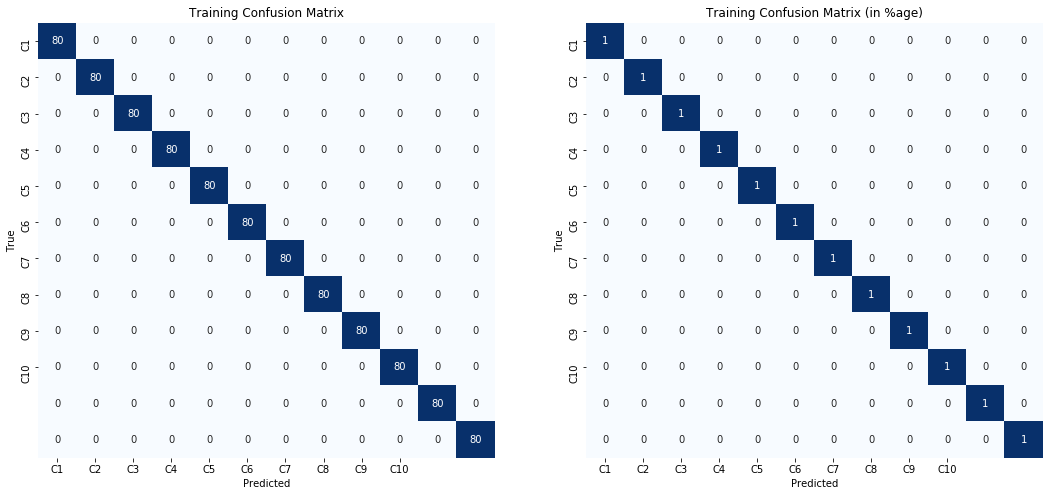

In [9]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_confu_matrix/80, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

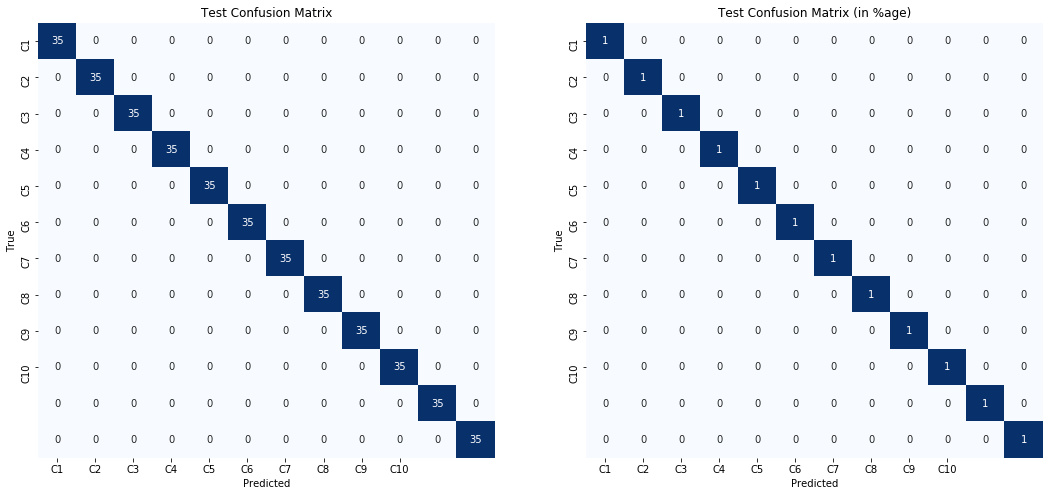

In [10]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix/35, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
overall_test_accuracy = accuracy_score(test_data['fault'], test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  1.0


We will also show the results excluding the normal data. The results are as below.

In [12]:
data_without_normal = pd.read_csv("./data/feature_wav_energy8_12k_1024_load_1.csv", nrows = 1265)

In [13]:
train_data_new, test_data_new = train_test_split(data_without_normal, test_size = 385, stratify = data_without_normal['fault'],
                                                random_state = 421)

In [14]:
boosting_clf_new = GradientBoostingClassifier(n_estimators= 200, max_depth= 2, subsample = 0.75, random_state = 782)

In [15]:
boosting_clf_new.fit(train_data_new.iloc[:,:-1], train_data_new['fault'])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=782, subsample=0.75, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [16]:
train_predictions_new = boosting_clf_new.predict(train_data_new.iloc[:,:-1])
test_predictions_new = boosting_clf_new.predict(test_data_new.iloc[:,:-1])

In [17]:
overall_train_accuracy_new = accuracy_score(train_data_new['fault'], train_predictions_new)
print("Overall train accuracy (excluding normal data): ", overall_train_accuracy)

Overall train accuracy (excluding normal data):  1.0


In [18]:
train_confu_new = confusion_matrix(train_data_new['fault'], train_predictions_new)
test_confu_new = confusion_matrix(test_data_new['fault'], test_predictions_new)

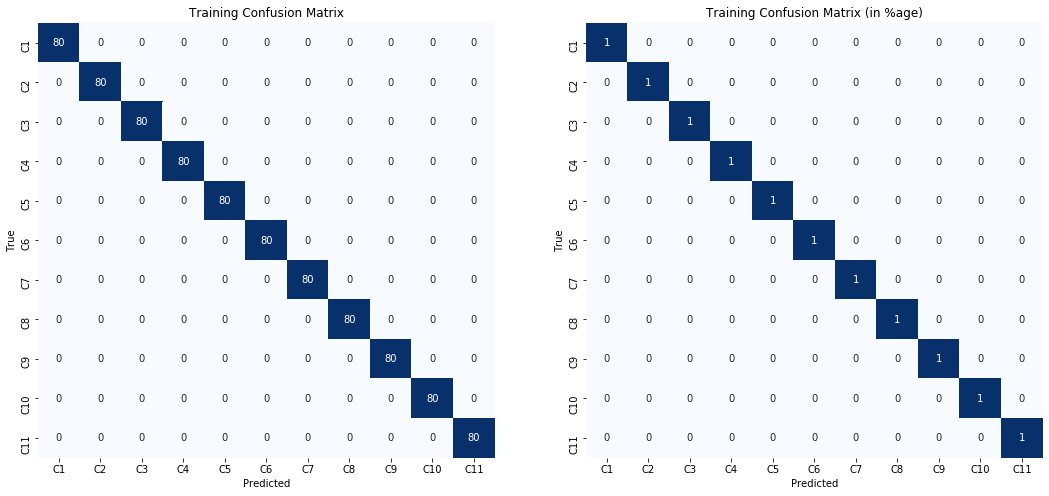

In [19]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_new, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_confu_new/80, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

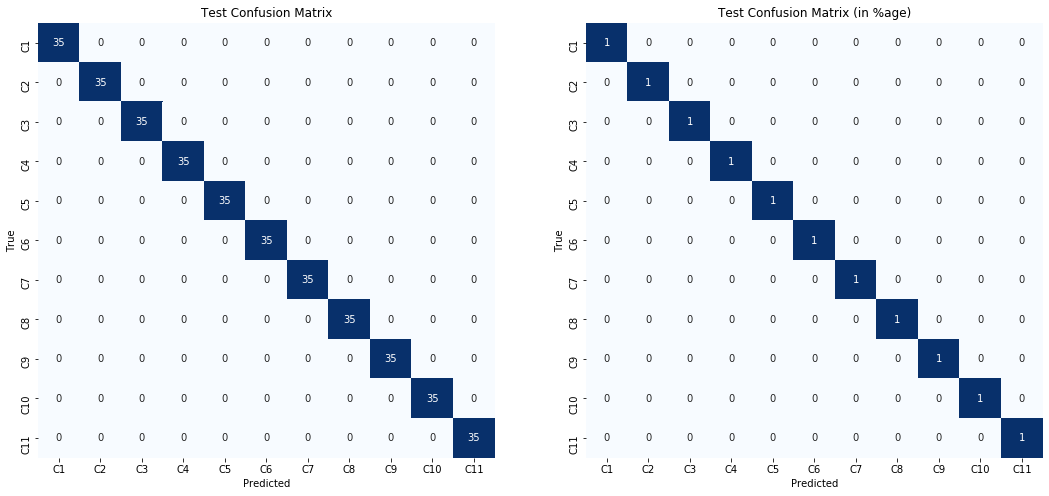

In [20]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confu_new, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_new/35, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [21]:
overall_test_accuracy_new = accuracy_score(test_data_new['fault'], test_predictions_new)
print("Overall test accuracy (excludling normal data): ", overall_test_accuracy_new)

Overall test accuracy (excludling normal data):  1.0


[To see results of other techniques applied to public condition monitoring datasets, visit this page](https://biswajitsahoo1111.github.io/cbm_codes_open/).